In [71]:
# !pip install perceval-quandela
# !pip install tqdm

In [72]:
import perceval as pcvl
import numpy as np
from math import comb
from scipy.optimize import minimize
import time
import matplotlib.pyplot as plt
import matplotlib as mpl
import tqdm as tqdm

In [73]:
# 0 - 4 50pt
delta0_4 = [-0.09998201551958563, -0.041398921617110895, 0.014876082921939648, 0.06550196432545041, 0.10870482610245391, 0.14395557753764399, 0.1716129838916829, 0.19257845491919223, 0.20799803263701566, 0.2190336495800862, 0.22671197977976032, 0.23184700914797363, 0.23502325696968374, 0.23662121134043934, 0.23686515045020484, 0.235875638256968, 0.2337136548280876, 0.23040931478245819, 0.22597415387623254, 0.22040089747652103, 0.2136576725535504, 0.20568443086086097, 0.1963980187215102, 0.18570936463996013, 0.1735524465641084, 0.15992094920376776, 0.14490567216987982, 0.12872442929158068, 0.11173668771604695, 0.09443745531037173, 0.07742850489129172, 0.061369224509496334, 0.04691337259274064, 0.03464099048421221, 0.024996060247586493, 0.018239874986318627, 0.014427568022892245, 0.013411255593799742, 0.014868519921213075, 0.01835040811583255, 0.023339672365160657, 0.029308390644047222, 0.0357648300046165, 0.042282468931868156, 0.04850904545974233, 0.05415949370417228, 0.059002530091858185, 0.06285519777080362, 0.06560172446134138, 0.06725176733381044]
omega0_4 = [38.40261585295435, 38.35387792639819, 38.27381105198065, 38.17963838092469, 38.08442246645903, 37.99692512396199, 37.92196842356517, 37.86114806729798, 37.813732926249315, 37.77759182735331, 37.75001657278828, 37.728351988428855, 37.7103915975682, 37.69454336486374, 37.67980708931454, 37.66562876871863, 37.651705556669896, 37.63780844400114, 37.623671551898575, 37.60897164197909, 37.59339462027876, 37.57676271939699, 37.55918087053592, 37.54115595545333, 37.52364850683536, 37.508031315537856, 37.49594997022028, 37.4891022843651, 37.488972380198376, 37.49656708634464, 37.51220481467138, 37.53539956659514, 37.564866461885934, 37.59865316757541, 37.634377985123756, 37.66953470622083, 37.70181083037722, 37.729362309197455, 37.75099580871918, 37.76622764298532, 37.775214090541674, 37.77857622951291, 37.77716831966265, 37.77185677673037, 37.763382593371716, 37.75237118740812, 37.73953006551309, 37.72603898857342]

# 4 - 6 50pt
delta4_6 = [0.06554330958298771, 0.0665167629484067, 0.06723614604456019, 0.06770846287545873, 0.06794430221100212, 0.06795704429411609, 0.06776216188608286, 0.06737663724272758, 0.06681850111154897, 0.06610648620571835, 0.06525977697358631, 0.06429783056253735, 0.06324024096137115, 0.062106619231749094, 0.06091646695668573, 0.05968902668482212, 0.05844310118053109, 0.05719684158731064, 0.05596751211850626, 0.05477124473018935, 0.053622800788439284, 0.05253535772720408, 0.05152033713859694, 0.05058728700193932, 0.049743825443834044, 0.04899564730363126, 0.048346588699532844, 0.04779873954713171, 0.04735259023839394, 0.04700719688595417, 0.04676034984909, 0.046608732569598466, 0.04654806167627901, 0.04657320426624001, 0.046678273501573386, 0.046856708390054014, 0.04710134712854691, 0.0474045051081764, 0.04775806828375756, 0.048153610045547746, 0.0485825352566055, 0.04903624927274702, 0.04950634330857373, 0.0499847813615939, 0.050464069000659584, 0.05093738152757987, 0.0513986290039693, 0.05184243877785616, 0.05226404247727068, 0.0526590635929719]
omega4_6 = [37.71984724665427, 37.71370832410639, 37.70778491303892, 37.70215512237856, 37.69687878101974, 37.69200001362049, 37.687550155511964, 37.68355064979664, 37.68001562930996, 37.67695396837104, 37.67437068385037, 37.67226766119785, 37.67064376844261, 37.66949449130015, 37.66881126924211, 37.66858073255549, 37.6687840339902, 37.66939643850027, 37.67038728620668, 37.67172038421344, 37.67335482028943, 37.67524613361551, 37.67734773173916, 37.67961241369573, 37.68199384988232, 37.68444787998288, 37.686933518851056, 37.68941360240058, 37.69185505523103, 37.69422881212465, 37.69650946988307, 37.698674778283866, 37.70070509485986, 37.70258292551673, 37.70429265193043, 37.705820509797, 37.70715483415133, 37.708286535482806, 37.70920972041739, 37.709922330533196, 37.71042664863661, 37.71072951808838, 37.71084213972806, 37.710779352033335, 37.71055836004055, 37.710196951315886, 37.70971131504795, 37.70911365398517]

# 6 - 8 50pt
delta6_8 = [0.052165046145215874, 0.052556129700364176, 0.05292071269191735, 0.05325513929233176, 0.05355649535555854, 0.05382259530896033, 0.05405195305522807, 0.05424374072712934, 0.05439773907538051, 0.054514282969715555, 0.05459420500085836, 0.05463877954253803, 0.05464966893016901, 0.054628872699812855, 0.05457868016795389, 0.054501626070699194, 0.05440044856049374, 0.05427804860705597, 0.05413744977479998, 0.053981757447919124, 0.053814116825527544, 0.0536376693790734, 0.05345550791003724, 0.05327063081970125, 0.05308589665231231, 0.05290398035164763, 0.052727332937078084, 0.052558146426294555, 0.052398325788658676, 0.05224946950144764, 0.05211285990788474, 0.05198946406611411, 0.05187994516528928, 0.05178468391378853, 0.051703808626633735, 0.05163723210649557, 0.05158469287691876, 0.05154579793466797, 0.051520063976482164, 0.05150695404902751, 0.05150590678301471, 0.05151635579622439, 0.05153773747075491, 0.051569486090840985, 0.05161101622613144, 0.05166169320530062, 0.0517207934860542, 0.05178745762559296, 0.05186063932934874, 0.05193905464887731]
omega6_8 = [37.7083669151971, 37.70767286750161, 37.70689833762961, 37.7060613362037, 37.705179356820956, 37.704269031372576, 37.70334587874687, 37.702424142471685, 37.70151670758711, 37.70063508301708, 37.69978943313406, 37.69898864117662, 37.69824038766287, 37.697551228793365, 37.696926662808615, 37.69637117607037, 37.69588826487526, 37.69548043330058, 37.69514917137142, 37.694894921156646, 37.69471704078525, 37.694613777647696, 37.69458226209287, 37.694618531766345, 37.69471759448839, 37.69487353441443, 37.695079662431866, 37.69532870767063, 37.695613042960524, 37.69592493341717, 37.69625679440321, 37.696601443134014, 37.696952327401476, 37.69730371536067, 37.697650832065996, 37.697989931395114, 37.698318295969656, 37.69863416240091, 37.69893657438003, 37.699225171403164, 37.69949992592482, 37.69976084610906, 37.700007664753365, 37.700239537152136, 37.70045477143406, 37.700650614148586, 37.70082311158036, 37.70096706353524]

# 8 - 10 50pt
delta8_10 = [0.0518976733949138, 0.05197753181219533, 0.05205946778522344, 0.05214074865257615, 0.05221955722712382, 0.0522947719943988, 0.05236574167668542, 0.052432079530809445, 0.05249349672103734, 0.052549686760182096, 0.052600265237078614, 0.05264476172284421, 0.05268265463463216, 0.05271343551079767, 0.052736686952115, 0.0527521584867368, 0.052759826637872764, 0.05275992911046937, 0.05275296769372331, 0.052739679537587264, 0.052720981229083023, 0.052697893961785175, 0.05267146059304384, 0.05264266624110301, 0.0526123732300811, 0.052581278808196526, 0.05254990050220644, 0.052518589739745554, 0.05248757006259651, 0.05245699247485679, 0.052426997757929764, 0.05239777434383586, 0.05236960078955233, 0.05234286403540299, 0.052318048239985704, 0.05229569363616268, 0.052276329966374976, 0.052260393960810045, 0.052248144335053426, 0.05223959029191039, 0.0522344500519252, 0.052232154255667324, 0.05223190517720924, 0.05223279683076923, 0.05223399375996879, 0.052234958299959056, 0.05223570826143856, 0.05223708022079096, 0.05224096878079132, 0.05225051001698827]
omega8_10 = [37.701091981281294, 37.70110940629467, 37.70107109566329, 37.700996785937335, 37.700900759507135, 37.700792017321035, 37.70067499929331, 37.70055068855982, 37.70041791432151, 37.700274668292614, 37.700119270120034, 37.699951253902434, 37.69977189588917, 37.69958435645526, 37.699393461150535, 37.69920519014073, 37.69902597793418, 37.6988619427322, 37.69871816580816, 37.69859812669643, 37.69850337220853, 37.69843346042165, 37.69838617980371, 37.6983580039469, 37.69834470908354, 37.69834205891148, 37.698346452114784, 37.698355433505114, 37.69836798926784, 37.698384577895, 37.69840688713738, 37.698437348721704, 37.69847848126781, 37.69853216260931, 37.69859895114827, 37.698677578976934, 37.698764726016314, 37.69885515505598, 37.69894224503168, 37.69901890855603, 37.69907882528474, 37.699117871545006, 37.69913558513881, 37.69913647799758, 37.69913100264301, 37.6991359935302, 37.699174441362075, 37.699274515003424]
 

In [74]:
X1 = np.linspace(0, 4, 50).tolist()  
X2 = np.linspace(4, 6, 50).tolist()  
X3 = np.linspace(6, 8, 50).tolist()
X4 = np.linspace(8, 10, 50).tolist()
X = []
X.extend(X1)
X.extend(X2)
X.extend(X3)
X.extend(X4)
print(len(X))

200


In [75]:

delta0_10 = delta0_4 + delta4_6 + delta6_8 + delta8_10
omega0_10 = omega0_4 + omega4_6 + omega6_8 + omega8_10

print(len(delta0_10))
print(len(omega0_10))

200
192


In [76]:
X_real = [0.0, 0.05025125628140704, 0.10050251256281408, 0.1507537688442211, 0.20100502512562815, 0.25125628140703515, 0.3015075376884422, 0.35175879396984927, 0.4020100502512563, 0.45226130653266333, 0.5025125628140703, 0.5527638190954773, 0.6030150753768844, 0.6532663316582915, 0.7035175879396985, 0.7537688442211056, 0.8040201005025126, 0.8542713567839196, 0.9045226130653267, 0.9547738693467337, 1.0050251256281406, 1.0552763819095476, 1.1055276381909547, 1.1557788944723617, 1.2060301507537687, 1.256281407035176, 1.306532663316583, 1.35678391959799, 1.407035175879397, 1.4572864321608041, 1.5075376884422111, 1.5577889447236182, 1.6080402010050252, 1.6582914572864322, 1.7085427135678393, 1.7587939698492463, 1.8090452261306533, 1.8592964824120604, 1.9095477386934674, 1.9597989949748744, 2.0100502512562812, 2.0603015075376883, 2.1105527638190953, 2.1608040201005023, 2.2110552763819094, 2.2613065326633164, 2.3115577889447234, 2.3618090452261304, 2.4120603015075375, 2.4623115577889445, 2.512562814070352, 2.562814070351759, 2.613065326633166, 2.663316582914573, 2.71356783919598, 2.763819095477387, 2.814070351758794, 2.864321608040201, 2.9145728643216082, 2.9648241206030153, 3.0150753768844223, 3.0653266331658293, 3.1155778894472363, 3.1658291457286434, 3.2160804020100504, 3.2663316582914574, 3.3165829145728645, 3.3668341708542715, 3.4170854271356785, 3.4673366834170856, 3.5175879396984926, 3.5678391959798996, 3.6180904522613067, 3.6683417085427137, 3.7185929648241207, 3.7688442211055277, 3.819095477386935, 3.869346733668342, 3.919597989949749, 3.969849246231156, 4.0201005025125625, 4.0703517587939695, 4.1206030150753765, 4.1708542713567835, 4.221105527638191, 4.271356783919598, 4.321608040201005, 4.371859296482412, 4.422110552763819, 4.472361809045226, 4.522613065326633, 4.57286432160804, 4.623115577889447, 4.673366834170854, 4.723618090452261, 4.773869346733668, 4.824120603015075, 4.874371859296482, 4.924623115577889, 4.974874371859296, 5.025125628140704, 5.075376884422111, 5.125628140703518, 5.175879396984925, 5.226130653266332, 5.276381909547739, 5.326633165829146, 5.376884422110553, 5.42713567839196, 5.477386934673367, 5.527638190954774, 5.577889447236181, 5.628140703517588, 5.678391959798995, 5.728643216080402, 5.778894472361809, 5.8291457286432165, 5.8793969849246235, 5.9296482412060305, 5.9798994974874375, 6.030150753768845, 6.080402010050252, 6.130653266331659, 6.180904522613066, 6.231155778894473, 6.28140703517588, 6.331658291457287, 6.381909547738694, 6.432160804020101, 6.482412060301508, 6.532663316582915, 6.582914572864322, 6.633165829145729, 6.683417085427136, 6.733668341708543, 6.78391959798995, 6.834170854271357, 6.884422110552764, 6.934673366834171, 6.984924623115578, 7.035175879396985, 7.085427135678392, 7.135678391959799, 7.185929648241206, 7.236180904522613, 7.28643216080402, 7.336683417085427, 7.386934673366834, 7.437185929648241, 7.4874371859296485, 7.5376884422110555, 7.5879396984924625, 7.63819095477387, 7.688442211055277, 7.738693467336684, 7.788944723618091, 7.839195979899498, 7.889447236180905, 7.939698492462312, 7.989949748743719, 8.040201005025125, 8.090452261306533, 8.140703517587939, 8.190954773869347, 8.241206030150753, 8.291457286432161, 8.341708542713567, 8.391959798994975, 8.442211055276381, 8.492462311557789, 8.542713567839195, 8.592964824120603, 8.64321608040201, 8.693467336683417, 8.743718592964823, 8.793969849246231, 8.844221105527637, 8.894472361809045, 8.944723618090451, 8.99497487437186, 9.045226130653266, 9.095477386934673, 9.14572864321608, 9.195979899497488, 9.246231155778894, 9.296482412060302, 9.346733668341708, 9.396984924623116, 9.447236180904522, 9.49748743718593, 9.547738693467336, 9.597989949748744, 9.64824120603015, 9.698492462311558, 9.748743718592964, 9.798994974874372, 9.849246231155778, 9.899497487437186, 9.949748743718592, 10.0]
delta0_10_real = [-0.1, -0.06472697231455782, -0.029691717290979018, 0.004381955258555435, 0.03676852394640574, 0.06684997038936709, 0.09418757092990773, 0.11855385990764342, 0.13990207650488148, 0.15833554985188938, 0.17405674319124195, 0.18731721422710823, 0.19839761163604197, 0.20756510246400853, 0.2150685624724183, 0.22114104044994506, 0.22599188477369336, 0.22978667677073364, 0.2326679356161034, 0.2347601552537347, 0.23616879302289065, 0.23697123182234647, 0.23722630460864325, 0.2369832428120201, 0.23628180348549657, 0.23515096062416144, 0.23360372955076067, 0.23164530661983956, 0.22927656364755358, 0.22649404969890527, 0.22329006636498888, 0.21965251609129172, 0.2155603813667572, 0.21099218444420212, 0.20592827651721368, 0.20035083772014967, 0.19424387712813806, 0.187594340684941, 0.18039501864861188, 0.1726391550355218, 0.16433437280671012, 0.1555044358955408, 0.14618924920770218, 0.13644485862120734, 0.1263434509863942, 0.11596388608736165, 0.10541577276166814, 0.0948452948072108, 0.08439784012435947, 0.07421753406233378, 0.06444723941920265, 0.05522855644188512, 0.04670182282614951, 0.0389935832875017, 0.032201473968312494, 0.026411414735322478, 0.021678880753354616, 0.018028468028669146, 0.015453893408963627, 0.013919779358890265, 0.013379790790850686, 0.013767217201418295, 0.015000090445534936, 0.016983686894884335, 0.01961052743789206, 0.022760377479725463, 0.02630827137178806, 0.030146121733263847, 0.034158886291760795, 0.03824004823719137, 0.04229294760944147, 0.04623078129837073, 0.04997788053874598, 0.05347120764879474, 0.05665529982805965, 0.05948749058855769, 0.06193830378418938, 0.06399145361073877, 0.06564379912399133, 0.06689809205771455, 0.06776089087037941, 0.06824647608326884, 0.06837473675401368, 0.06817117047659271, 0.06766688338133274, 0.06689859013490847, 0.0659064949404694, 0.06472257492466735, 0.06338647083183767, 0.06193785862823791, 0.06041444235552983, 0.05885195413077942, 0.05728415414645697, 0.05574283067043697, 0.05425767562413178, 0.05285280941144913, 0.05155160174910113, 0.05037459200744741, 0.04933745088498729, 0.048450980408359774, 0.04772111393234353, 0.04714891613985697, 0.046731677940734864, 0.046466586499410205, 0.04634780704640731, 0.04636709934976426, 0.046513906086881385, 0.046775352844521244, 0.04713624811880866, 0.047579083315230725, 0.0480843127657203, 0.04863902060837192, 0.04922826273498762, 0.04983530859696034, 0.05044508948577829, 0.05104419853302492, 0.05162089071037895, 0.05216508282961436, 0.05266835354260036, 0.05312394334130139, 0.053527021280517464, 0.05387388453706323, 0.054161116256482185, 0.05438688054326334, 0.054550958797500756, 0.054654749714893536, 0.05470126928674581, 0.05469515079996677, 0.05464247532278139, 0.05454746749360854, 0.054415006292348675, 0.05425073757401946, 0.05406030883453573, 0.05384936921070952, 0.05362356948025006, 0.05338856206176373, 0.053150001014754124, 0.052913542039621994, 0.05268484247766533, 0.05246956131107925, 0.05227246022892746, 0.05209288096895292, 0.05193303630282895, 0.051795233325014046, 0.05168101869211498, 0.051591178622886785, 0.0515257388982328, 0.051483964861204635, 0.05146436141700216, 0.05146467303297358, 0.05148253048820702, 0.0515169058210272, 0.051565916192051434, 0.05162755790818971, 0.05169976982221223, 0.051780433332749384, 0.051867372384291795, 0.051958353467190244, 0.052051085617655736, 0.0521432204177595, 0.05223235199543293, 0.052316017024467636, 0.052392111107018496, 0.0524618684686227, 0.052524519657080285, 0.05257887855036213, 0.052624088468234506, 0.052659622172259064, 0.052685281865792875, 0.052701199193988406, 0.052707835243793494, 0.052705980543951404, 0.05269675506500079, 0.0526816082192757, 0.052662087511711045, 0.052638031889463366, 0.05261005648515415, 0.05257906374894107, 0.05254591723949729, 0.052511441624011425, 0.05247642267818761, 0.05244160728624543, 0.052407703440919974, 0.05237538024346179, 0.05234526790363693, 0.052317957739726896, 0.05229400217852872, 0.05227391475535486, 0.05225780275384082, 0.05224494398888573, 0.05223540197630202, 0.05222921751862256, 0.05222634914111782, 0.05222667309179576, 0.052229983341401935, 0.052235991583419426, 0.05224432723406888, 0.05225453743230847, 0.052266087039833944, 0.05227835864107858]
omega_0_10_real = [38.39911, 38.400948507038315, 38.38922818707857, 38.362684650438936, 38.32244800602715, 38.271551018877766, 38.21399715939486, 38.15382827094793, 38.09439985219996, 38.03816262161714, 37.98657533638256, 37.94035993636704, 37.89964183189449, 37.86417133809819, 37.83353264903903, 37.807194909930104, 37.784557309457114, 37.76508436183335, 37.74827670258136, 37.733667572320236, 37.72082774153344, 37.70940690662805, 37.69910887677647, 37.68966382540637, 37.68082797978881, 37.67238919232862, 37.664183198554234, 37.6560674985568, 37.64791487311225, 37.639613466920245, 37.63106713961512, 37.622206264735084, 37.61297893621156, 37.60335566108362, 37.59333431971416, 37.582940165789935, 37.572225826321535, 37.561271315907774, 37.550205589811966, 37.53922411293435, 37.528561679737145, 37.51849008757443, 37.50931813669214, 37.501391630228056, 37.49509337421182, 37.49077827216, 37.4887866294952, 37.4894893717924, 37.49312826371561, 37.4998136105939, 37.50952425842142, 37.52210759385741, 37.53727954422617, 37.55467445349412, 37.57387081670377, 37.594343529746006, 37.61557137987556, 37.637039108621316, 37.658237411786324, 37.678672796174745, 37.697945874491815, 37.71567171102929, 37.73153312306764, 37.74529740834271, 37.75681634504562, 37.76602619182288, 37.772931810961865, 37.7775580068178, 37.77999814272655, 37.7803907974464, 37.77891735288685, 37.77580199410854, 37.771295163315074, 37.76562185511989, 37.75903284835415, 37.75176609600409, 37.74404285272884, 37.73606767486042, 37.7280282931445, 37.72008399218452, 37.7123846791775, 37.70506749508695, 37.698246198713896, 37.69201116669684, 37.68642939351176, 37.681544491472145, 37.677378970396084, 37.67395776742881, 37.67129746232231, 37.66939869093564, 37.668247067990116, 37.667813187069285, 37.668052620618944, 37.668905919947115, 37.67029934327366, 37.67217079656803, 37.67445057838822, 37.677060230903805, 37.67992198119132, 37.682958741234245, 37.68609410792297, 37.68925236305484, 37.69236508742345, 37.6953766390483, 37.69822386308102, 37.700853819905596, 37.703224684860864, 37.70530574824047, 37.70707741529291, 37.70853120622149, 37.70966955493066, 37.71049635585033,
 37.71101658359507, 37.71124159250015, 37.7111878197877, 37.71087678556672, 37.71033509283304, 37.70959442746938, 37.70869155824532, 37.707668336817285, 37.706560902380545, 37.70538708617101, 37.70417894150905, 37.70296598182971, 37.7017743919173, 37.70062702790535, 37.699543417276665, 37.69853975886331, 37.69762831726704, 37.69681139765285, 37.69610000165362, 37.69550548277845, 37.69503532027791, 37.69469311914403, 37.694478610110316, 37.694387649651745, 37.69441221998477, 37.6945404290673, 37.69475651059872, 37.6950408240199, 37.69537358709104, 37.6957559595969, 37.6961777542671, 37.696626343395, 37.69708997931948, 37.69755779442487, 37.69801980114099, 37.69846689194315, 37.69889083935213, 37.6992842959342, 37.69964331187682, 37.6999675484144, 37.70025067794781, 37.70048768754482, 37.700675242195494, 37.70081168481211, 37.70089703622919, 37.70093299520354, 37.70092293841416, 37.70087192046235, 37.700786673871605, 37.70067560908772, 37.700547476621715, 37.7004004439403, 37.70023777392769, 37.700064542, 37.6998854400092, 37.699704776243074, 37.699526475425216, 37.69935407871505, 37.6991907437078, 37.69903924443455, 37.69890197136216, 37.69878093139332, 37.69867721594031, 37.6985883035677, 37.698515204450814, 37.69845932627111, 37.698421517465285, 37.69840206722522, 37.69840070549802, 37.69841660298598, 37.69844837114663, 37.69849406219267, 37.69855116909204, 37.69861662556787, 37.698686806098486, 37.69875752591744, 37.698826276879316, 37.69889575906123, 37.69896441240117, 37.69903059124534, 37.69909290273435, 37.69915020680322, 37.69920161618136, 37.699246496392625, 37.699284465755234, 37.69931539538183, 37.69933940917949, 37.69935688384964]

Text(0, 0.5, '$\\omega(t)$')

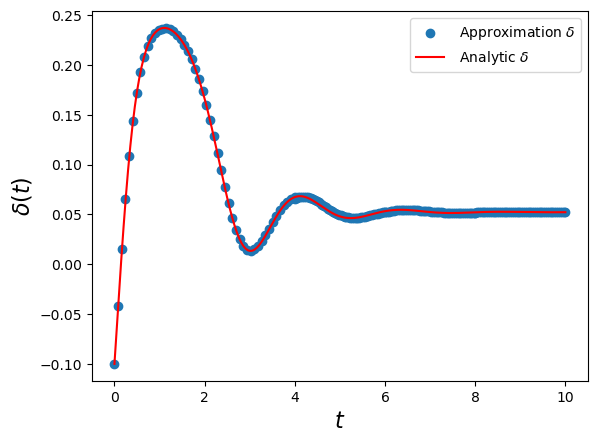

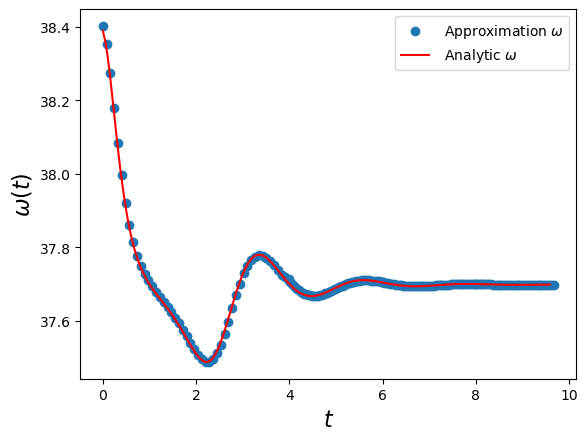

In [77]:
plt.figure()

# plt.scatter(X,delta0_10,facecolors='none', edgecolors='r', label='True - del_t')
# plt.plot(X, delta0_10, label=" Approximation delta")
plt.scatter(X, delta0_10, label=" Approximation $\delta$")
plt.plot(X_real, delta0_10_real, color='r',label=" Analytic $\delta$")

# plt.scatter(X,pred_train_X, color='red',marker="x",s=4,label='Prediction - del_t')
plt.xlabel('$t$',fontsize=16)
plt.ylabel('$\delta(t)$',fontsize=16)
plt.legend()
plt.figure()
plt.scatter(X[0:192], omega0_10, label=" Approximation $\omega$")
plt.plot(X_real[0:192], omega_0_10_real[2:194], color='r', label=" Analytic $\omega$")
plt.legend()
# plt.scatter(X,pred_train_X, color='red',marker="x",s=4,label='Prediction - del_t')
plt.xlabel('$t$',fontsize=16)
plt.ylabel('$\omega(t)$',fontsize=16)